# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- version v0

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Logbook for file selection

In [3]:
filename_logbook='logbooks/auxtellogbook_2021_v1.csv'

In [4]:
df=pd.read_csv(filename_logbook)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,exposure,focus,seeing,pressure,temperature,humidity,windspd
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,90.0,-0.034843,NaN,743.10,10.3,51.0,9.3
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,90.0,0.000000,NaN,742.80,10.4,45.0,9.9
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,6.0,0.000000,NaN,742.30,8.8,53.0,7.3
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,6.0,0.000000,NaN,742.25,8.7,55.0,6.7


# Selection of input file

In [7]:
dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"

In [8]:
filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [9]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs/"
guess = [250,2600]
disperser_label = "holo4_003"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = "HD75519"

# Configuration of the running mode

In [10]:
parameters.debug=True
parameters.verbose=True
parameters.display=True

# Load an image

In [11]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

## Show relevant parameters

In [12]:
parameters.OBS_NAME

'AUXTEL'

In [13]:
parameters.LAMBDA_MIN 

563

In [14]:
parameters.LAMBDA_MAX 

1095

In [15]:
image.filter_label

'RG610'

In [16]:
image.header["FILTER"]

'RG610'

# Plot image and find the target position

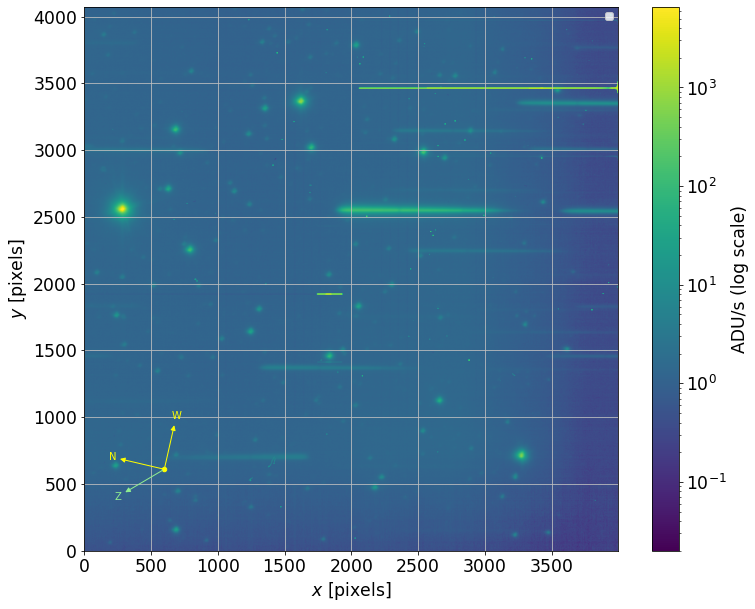

In [17]:
image.plot_image(figsize=(12, 10),scale="log")

2021-03-30 18:06:06  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1        
    ----------------- ------------------- --------------------
    7.721926375828376 0.03949544975759403 -0.04345072886063248
2021-03-30 18:06:07  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 10 iterations because the relative change of cost is below ftol=1.25e-05.


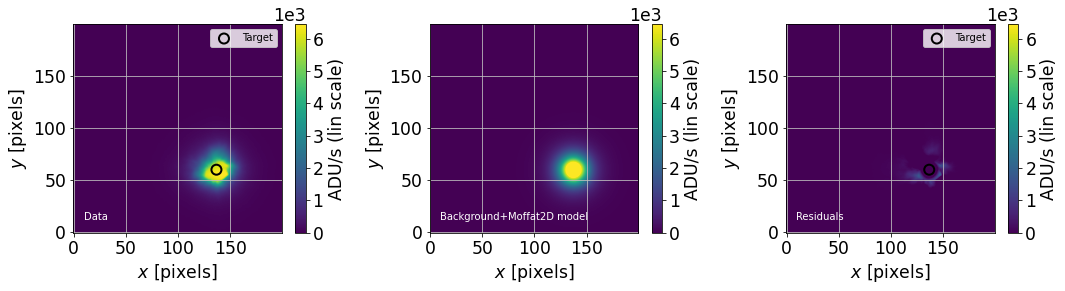

2021-03-30 18:06:08  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


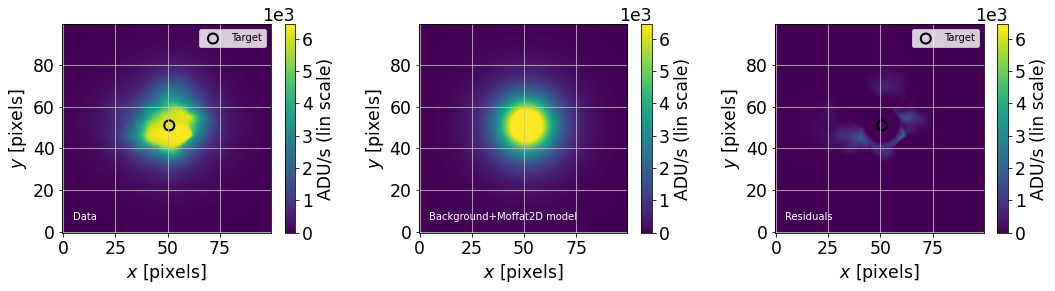

In [18]:
guess = [250, 2600]
parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [19]:
print(x1,y1)

286.80885747731224 2559.9607466280945


# Go for spectrum reconstruction

2021-03-30 18:06:09  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-03-30 18:06:09  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits...
2021-03-30 18:06:09  Image      load_AUXTEL_image    INFO   
	Image loaded


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-03-30 18:06:09  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-03-30 18:06:09  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-03-30 18:06:09  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 100.00 +/- 1.00 grooves/mm
	Average tilt of 0.0 degrees
2021-03-30 18:06:13  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=563 and parameters.LAMBDA_MAX=1095.
2021-03-30 18:06:13  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC      ... PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2
             "h:m:s"       "d:m:s"    ...    mas / yr        deg                
--------- ------------- ------------- ... ------------- -------------- ---------
HD  75519 08 49 05.6896 -39 57 15.798 ...         0.064             90 0.000074

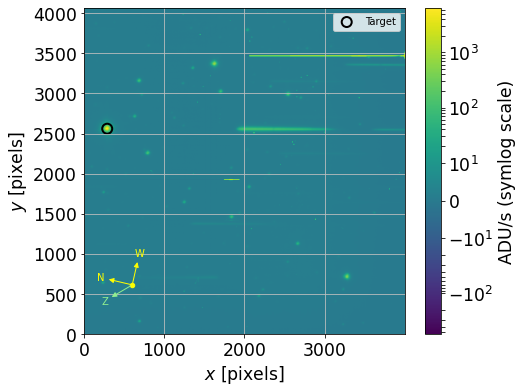

2021-03-30 18:06:16  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 286.80885748 2559.96074663]...
2021-03-30 18:06:16  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD75519_2021-03-11_296_wcs/Cor_holo4_003_RG610_HD75519_2021-03-11_296.wcs available, use 2D fit to find target pixel position.
2021-03-30 18:06:16  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                  c0_1        
    ----------------- ---------------------- --------------------
    7.851977043377331 -0.0003522437397808937 0.003304998299789622
2021-03-30 18:06:17  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 11 iterations because the relative change of cost is below ftol=1.25e-05.


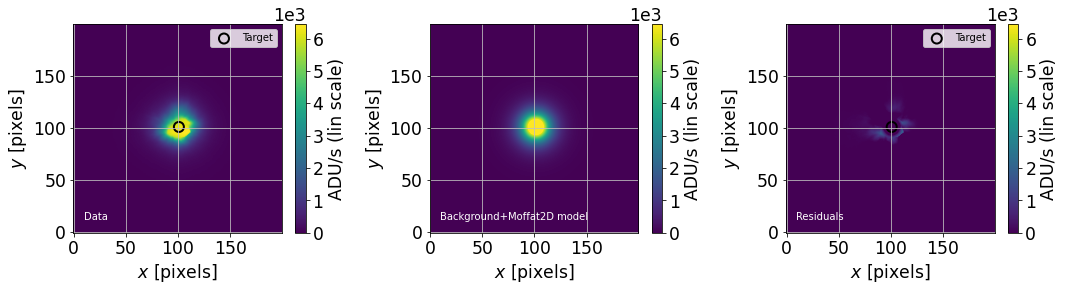

2021-03-30 18:06:18  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


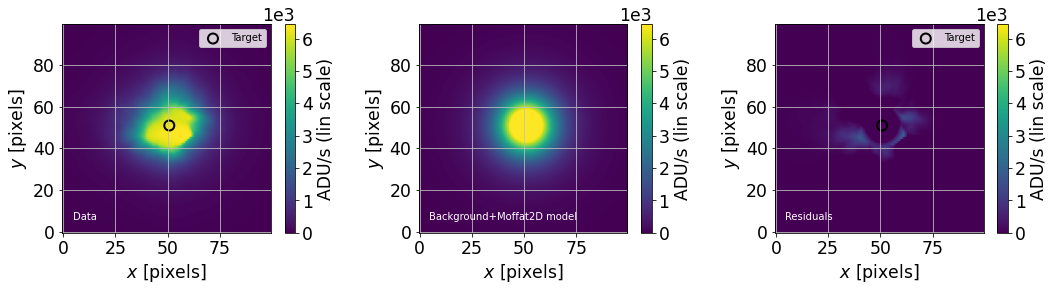

2021-03-30 18:06:18  Image      find_target          INFO   
	X,Y target position in pixels: 286.830,2559.928


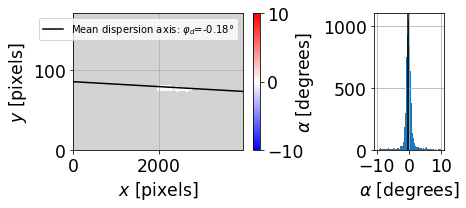

2021-03-30 18:06:19  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.18 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


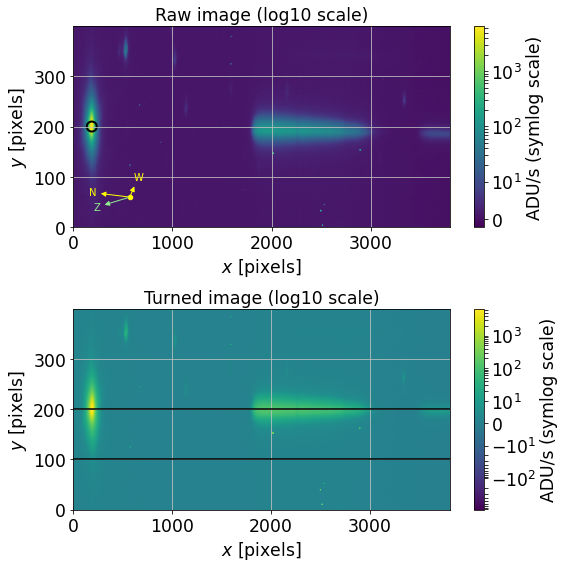

2021-03-30 18:06:30  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-03-30 18:06:30  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                 c0_1       
    ----------------- --------------------- -------------------
    83.47024604282446 0.0044785422481271545 0.13353949710936466
2021-03-30 18:06:30  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 8 iterations because the relative change of cost is below ftol=5e-05.


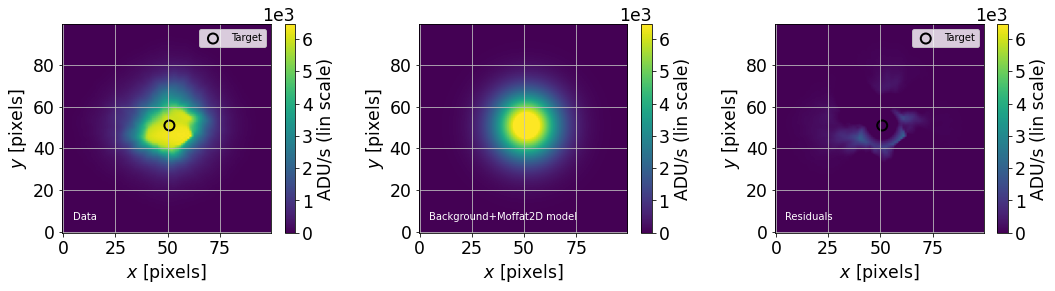

2021-03-30 18:06:31  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 8 iterations because the relative change of cost is below ftol=0.0002.


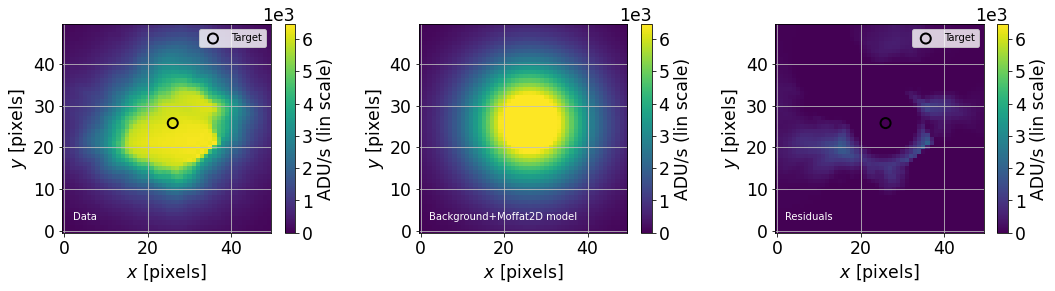

2021-03-30 18:06:31  Image      find_target          INFO   
	X,Y target position in pixels: 291.997,2560.790
2021-03-30 18:06:31  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-03-30 18:06:31  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=565.0000000000005 and parameters.LAMBDA_MAX=1089.8000000001198.
2021-03-30 18:06:31  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-03-30 18:06:32  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1282:2210,2380:2740] (size (928, 360))


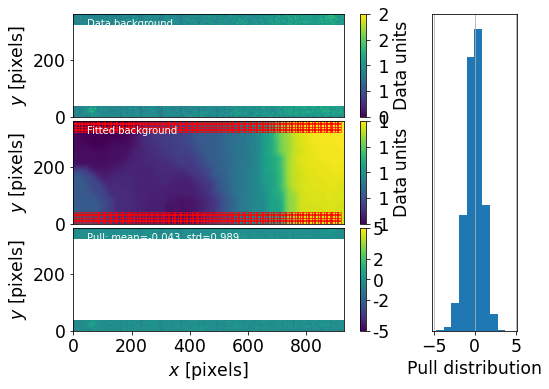

2021-03-30 18:06:33  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
2021-03-30 18:06:41  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-3.9170940931039).
2021-03-30 18:06:41  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (180.0).
2021-03-30 18:06:41  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (3.0).
2021-03-30 18:06:41  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (2.0).
2021-03-30 18:06:41  spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent terminated in 0 iterations because all parameters have null Jacobian.
2021-03-30 18:06:41  spectrac

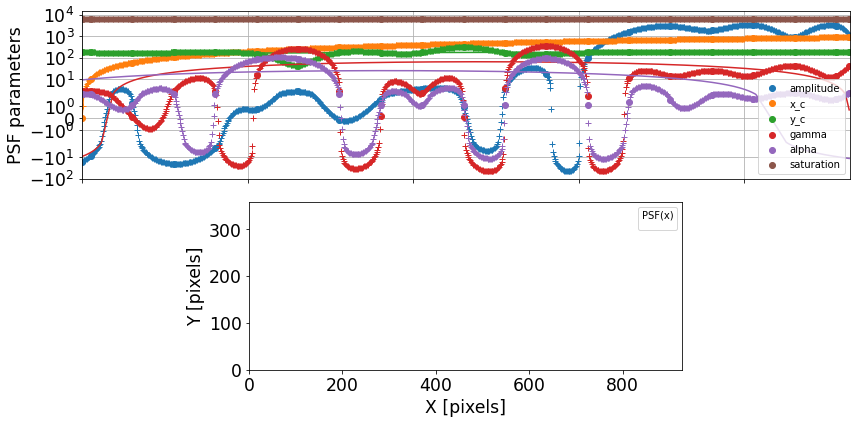

2021-03-30 18:06:45  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=5.6651e+05 initial chisq_red=15.262
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-0.56958456 -1.23202107  0.5989791   0.38685345  0.76558216 -5.58786067
 -8.43706725 14.95119442 -6.65008866]
	New parameters: [  7.15721373 -16.76982194   7.5596057  -38.31699768 100.15930955
 -48.88690675  -7.12852977  16.20877473  -7.68845964]
	Final cost=1.1472e+05 final chisq_red=3.0906 computed in 0.92s
2021-03-30 18:06:46  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=1.1472e+05 initial chisq_red=3.0906
		 Line search: alpha_min=0.573 iter=3 funcalls=7
	Parameter shifts: [ -0.28656382   0.48979064  -0.10437421  30.25588398 -57.62516827
  27.99369209   5.41666792 -10.23832234   4.90815442]
	New parameters: [  6.87064991 -16.2800313    7.45523149  -8.0611137   42.53414128
 -20.89321467  -1.71186185   5.9704524   -2.78030523]
	Final cost=1.0811e+05 fi

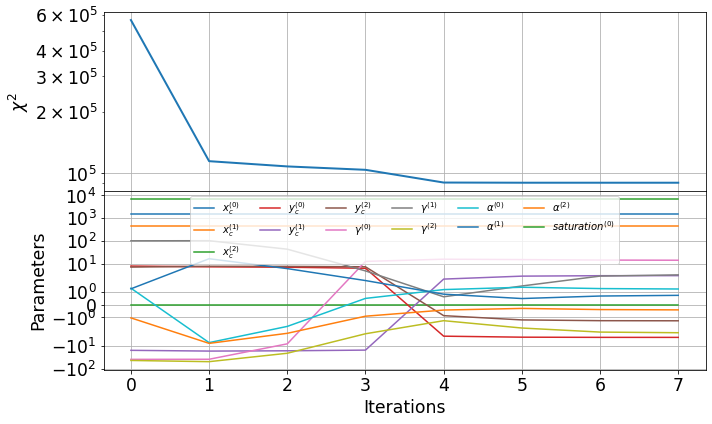

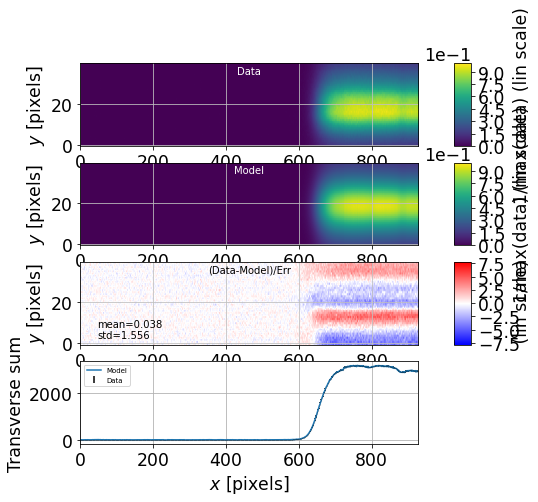

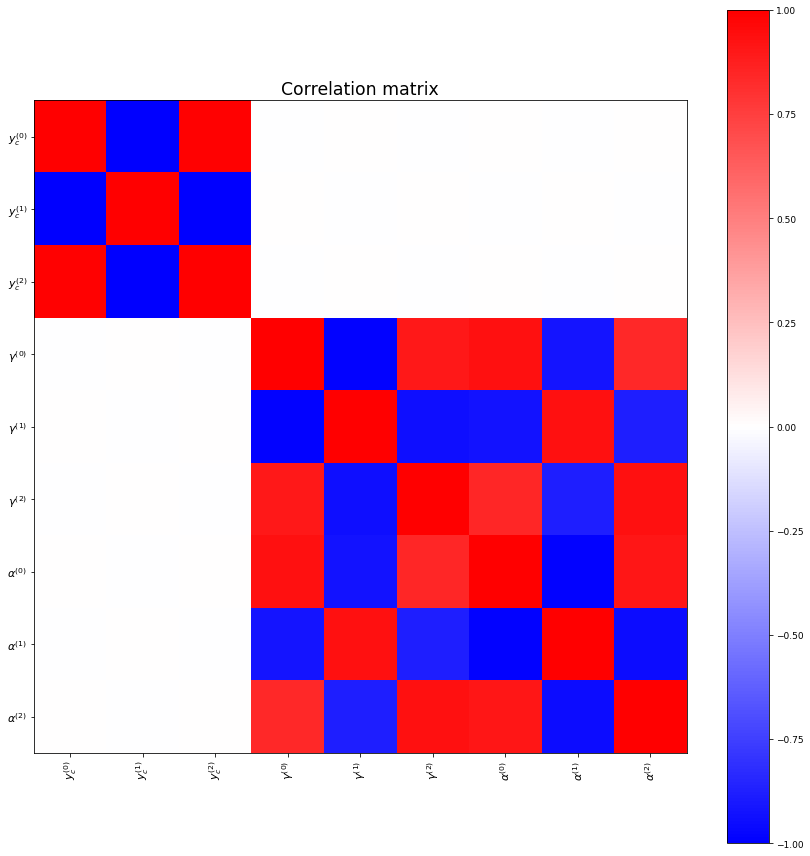

2021-03-30 18:06:54  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude       x_c  ...          Dy         Dy_disp_axis
------------------- ----- ... ------------------- ------------
 0.7349535627804601   0.0 ...  -8.403186374624255          0.0
 -5.221874657091108   1.0 ...  -8.388648393496368          0.0
-2.9648395256458477   2.0 ...   -8.37412813136973          0.0
 0.5251282162194209   3.0 ...  -8.359625588244313          0.0
 -5.928400276085671   4.0 ...  -8.345140764120146          0.0
-0.6472844658914833   5.0 ...  -8.330673658997199          0.0
 -5.397394691419496   6.0 ...   -8.31622427287553          0.0
 -3.638072829810412   7.0 ...  -8.301792605755082          0.0
-0.5265375650190379   8.0 ...  -8.287378657635855          0.0
-0.6336242501193129   9.0 ...  -8.272982428517878          0.0
                ...   ... ...                 ...          ...
 3545.4660812766274 917.0 ...  -2.513590135050663  

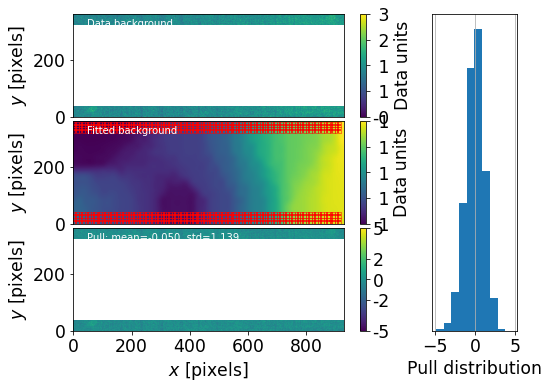

2021-03-30 18:06:56  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=1.233 ADU/s, RMS=0.413 ADU/s.
2021-03-30 18:06:56  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1275:2203,2374:2737] (size (928, 363))
	New target position in spectrogram frame: [-988.1700291806055, 185.92803738906696]


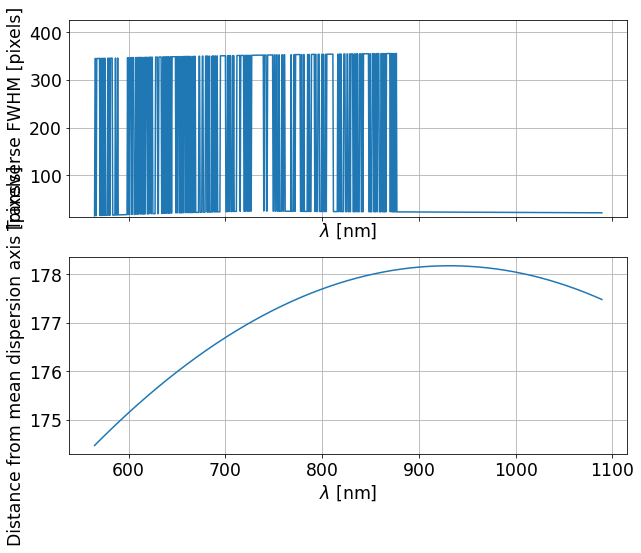

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


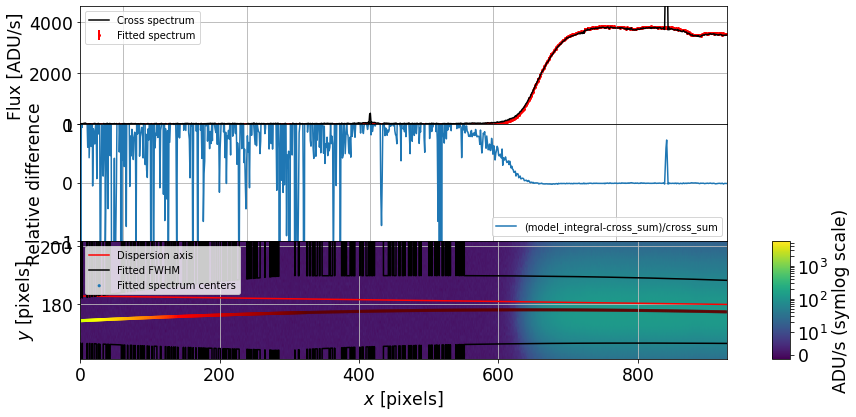

2021-03-30 18:06:58  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...
2021-03-30 18:07:07  Spectrum   calibrate_spectrum   WARNING 
	Minimum chisq is on the edge of the exploration grid.


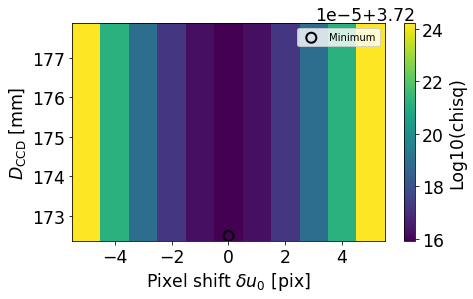

TypeError: Cannot convert list to iminuit._libiminuit.ErrorView

In [20]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)